In [10]:
#This was an old notebook, i changed the data source and improve the normalisation process
#import necessary modules
import rasterio as rt
import matplotlib.pyplot as plt
from rasterio.plot import show
# Open a Sentinel-2 band in jp2 format
with rt.open('R20m\T50SLH_20230104T030121_B04_20m.jp2') as src:
    # Read the pixel values into a NumPy array
    img = src.read(masked = True)
    # Print the metadata
    print(src.meta)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 5490, 'height': 5490, 'count': 1, 'crs': None, 'transform': Affine(20.0, 0.0, 300000.0,
       0.0, -20.0, 4300020.0)}


In [6]:
import zipfile
from glob import glob
import numpy as np

# Extract the bands from the SAFE archive, un comment if you want to extract the zip folder
#with zipfile.ZipFile('downloads/sentinel-2.zip', 'r') as zip_ref:
#    zip_ref.extractall('work/sentinel-2')

band_files = sorted(glob('R20m/*B*.jp2'))
band_files

['R20m\\T50SLH_20230104T030121_B01_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B02_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B03_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B04_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B05_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B06_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B07_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B11_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B12_20m.jp2',
 'R20m\\T50SLH_20230104T030121_B8A_20m.jp2']

In [26]:
#create an empty list to store the band data
data_list = []

#Loop over the jp2 files
for file in band_files:
    # Open the jp2 file with rasterio
    with rt.open(file, 'r') as dataset:
        # Read the pixel values of the jp2 file
        bands = dataset.read()
        # Assign 0 for the nan value
        bands[np.isnan(bands)] = 0.000001
        # Append the band data to the list
        data_list.append(bands)

#Stack the band data along a new axis to create a 3D NumPy array
data = np.stack(data_list, axis=-1)

In [27]:
data.shape 

(1, 5490, 5490, 10)

In [30]:
#Remove the first dimension, since we dont need it (not compltely sure, why it was introduced)
data = np.squeeze(data)
data.shape

(5490, 5490, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


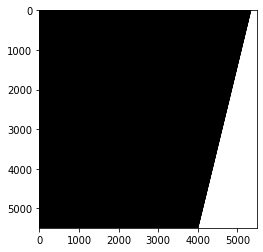

In [48]:
plt.imshow(data[:,:,4:1:-1]) #we need to normalise data for better display, the black region indicates no data values

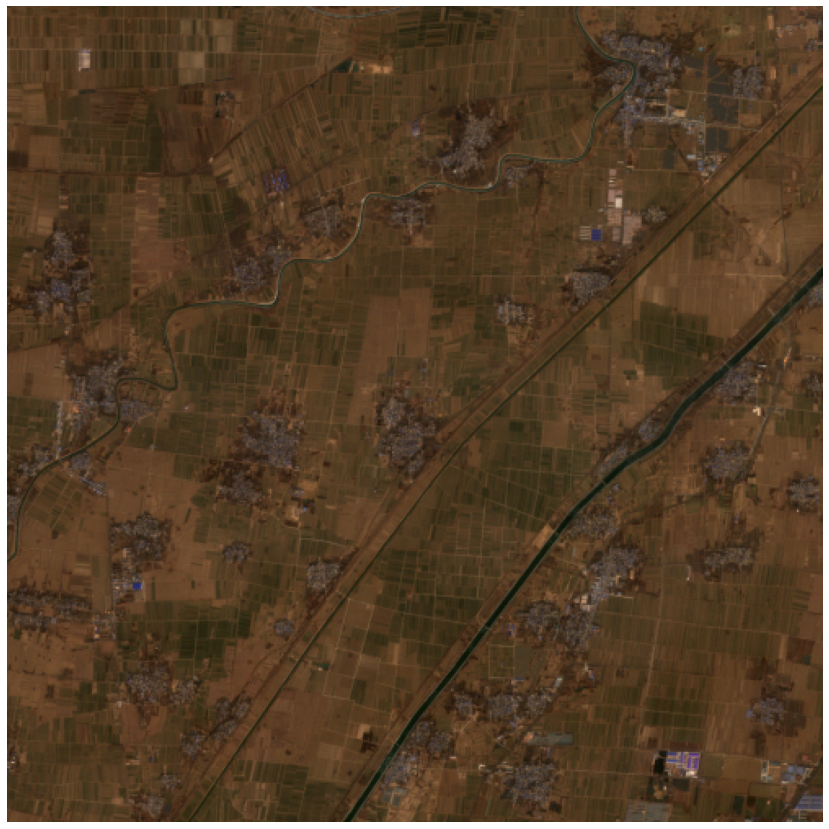

In [75]:
# data.shape (5490, 5490, 10)
rgb_data = data[:, :, [3, 2, 1]]  # Select the red, green, and blue bands for RGB visualization

# Crop the image to the lower right corner
crop_size = 500
lower_right_rgb_data = rgb_data[-crop_size:, -crop_size:, :]

# Get the minimum and maximum values in the cropped region
min_val = np.nanmin(lower_right_rgb_data)
max_val = np.nanmax(lower_right_rgb_data)

# Normalize the cropped RGB data using the minimum and maximum values from the cropped region
lower_right_rgb_data = (lower_right_rgb_data - min_val) / (max_val - min_val)

# Create a figure and display data
plt.figure(figsize=(15, 15)) 
plt.imshow(lower_right_rgb_data)
plt.axis('off') 
plt.show()